In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cryptocurrencypricehistory/coin_ChainLink.csv
/kaggle/input/cryptocurrencypricehistory/coin_Cardano.csv
/kaggle/input/cryptocurrencypricehistory/coin_Solana.csv
/kaggle/input/cryptocurrencypricehistory/coin_Dogecoin.csv
/kaggle/input/cryptocurrencypricehistory/coin_Polkadot.csv
/kaggle/input/cryptocurrencypricehistory/coin_NEM.csv
/kaggle/input/cryptocurrencypricehistory/coin_XRP.csv
/kaggle/input/cryptocurrencypricehistory/coin_Ethereum.csv
/kaggle/input/cryptocurrencypricehistory/coin_Aave.csv
/kaggle/input/cryptocurrencypricehistory/coin_Bitcoin.csv
/kaggle/input/cryptocurrencypricehistory/coin_Cosmos.csv
/kaggle/input/cryptocurrencypricehistory/coin_Litecoin.csv
/kaggle/input/cryptocurrencypricehistory/coin_Uniswap.csv
/kaggle/input/cryptocurrencypricehistory/coin_EOS.csv
/kaggle/input/cryptocurrencypricehistory/coin_BinanceCoin.csv
/kaggle/input/cryptocurrencypricehistory/coin_CryptocomCoin.csv
/kaggle/input/cryptocurrencypricehistory/coin_USDCoin.csv
/kaggle/input/c

πρόβλεψη χρονοσειρών με την χρήση προηγμένων μοντέλων Τεχνητής Νοημοσύνης (LLMs)

In [7]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import to_date

# Δημιουργία Spark Session
spark = SparkSession.builder.appName("Ανάλυση Κρυπτονομισμάτων").getOrCreate()

# Λίστα με τα 5 κρυπτονομίσματα που θα αναλύσουμε
kripta = ["Bitcoin", "Ethereum", "Dogecoin", "Aave", "BinanceCoin"]
dedomena = {}

# Φόρτωση των δεδομένων για κάθε κρυπτονόμισμα
for nomisma in kripta:
    arxeio = f"/kaggle/input/cryptocurrencypricehistory/coin_{nomisma}.csv"
    df = spark.read.option("header", True).csv(arxeio, inferSchema=True)
    
    # Μετατροπή της στήλης 'Date' σε τύπο ημερομηνίας και ταξινόμηση με βάση την ημερομηνία
    df = df.withColumn("Date", to_date("Date", "dd-MM-yyyy")).orderBy("Date")
    
    dedomena[nomisma] = df

# Εμφάνιση των 5 πρώτων γραμμών για κάθε κρυπτονόμισμα
for nomisma in kripta:
    print(f"\n🔹 {nomisma} 🔹\n")
    dedomena[nomisma].show(5)


25/05/04 19:00:37 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.



🔹 Bitcoin 🔹

+---+-------+------+----------+------------------+------------------+------------------+------------------+------+---------------+
|SNo|   Name|Symbol|      Date|              High|               Low|              Open|             Close|Volume|      Marketcap|
+---+-------+------+----------+------------------+------------------+------------------+------------------+------+---------------+
|  1|Bitcoin|   BTC|2013-04-29|147.48800659179688|             134.0|134.44400024414062| 144.5399932861328|   0.0| 1.6037688645E9|
|  2|Bitcoin|   BTC|2013-04-30|146.92999267578125| 134.0500030517578|             144.0|             139.0|   0.0|  1.542813125E9|
|  3|Bitcoin|   BTC|2013-05-01|139.88999938964844|107.72000122070312|             139.0|116.98999786376953|   0.0|1.29895459375E9|
|  4|Bitcoin|   BTC|2013-05-02| 125.5999984741211| 92.28189849853516|116.37999725341797|105.20999908447266|   0.0|1.16851749525E9|
|  5|Bitcoin|   BTC|2013-05-03|108.12799835205078|  79.0999984741211|

🧠 Τι κάνει αυτός ο κώδικας:
Spark Session: Ξεκινάς μια "συνεδρία" Spark, που είναι απαραίτητη για να διαχειριστείς μεγάλα datasets σε περιβάλλον big data.

crypto_list / kripta: Είναι μια λίστα με τα ονόματα των 5 κρυπτονομισμάτων που θες να μελετήσεις.

for loop (για κάθε νόμισμα):

Δημιουργεί το path για το αντίστοιχο CSV αρχείο.

Φορτώνει τα δεδομένα από το CSV.

Μετατρέπει τη στήλη Date από string σε ημερομηνία (date format).

Ταξινομεί τα δεδομένα κατά ημερομηνία (orderBy).

Αποθηκεύει κάθε DataFrame στο λεξικό dedomena.

Τελική εμφάνιση: Για κάθε νόμισμα εμφανίζει τις πρώτες 5 γραμμές του πίνακα.



🧩 Βήμα 1: Ανάλυση Τιμών για κάθε Κρυπτονόμισμα
Για κάθε νόμισμα, θα υπολογίσουμε:

📈 Μέγιστη τιμή (High)

📉 Ελάχιστη τιμή (Low)

📊 Μέση τιμή (Average Close)

In [8]:
from pyspark.sql.functions import max, min, avg

# Ανάλυση για κάθε κρυπτονόμισμα
for nomisma in kripta:
    print(f"\n📊 Ανάλυση για {nomisma}:\n")
    
    dedomena[nomisma].select(
        max("High").alias("Μέγιστη Τιμή"),
        min("Low").alias("Ελάχιστη Τιμή"),
        avg("Close").alias("Μέση Τιμή Κλεισίματος")
    ).show()



📊 Ανάλυση για Bitcoin:

+-------------+----------------+---------------------+
| Μέγιστη Τιμή|   Ελάχιστη Τιμή|Μέση Τιμή Κλεισίματος|
+-------------+----------------+---------------------+
|64863.0989077|65.5260009765625|    6711.290443071496|
+-------------+----------------+---------------------+


📊 Ανάλυση για Ethereum:

+------------+------------------+---------------------+
|Μέγιστη Τιμή|     Ελάχιστη Τιμή|Μέση Τιμή Κλεισίματος|
+------------+------------------+---------------------+
|4362.3505418|0.4208970069885254|    383.9106913193636|
+------------+------------------+---------------------+


📊 Ανάλυση για Dogecoin:

+------------+--------------------+---------------------+
|Μέγιστη Τιμή|       Ελάχιστη Τιμή|Μέση Τιμή Κλεισίματος|
+------------+--------------------+---------------------+
|   0.7375666|8.547439938411117E-5| 0.013762639322080631|
+------------+--------------------+---------------------+


📊 Ανάλυση για Aave:

+------------+-------------+---------------------+
|Μ

🧩 Βήμα 2: Σύγκριση Τάσεων (Trends)
Θα δούμε π.χ. ποιο νόμισμα είχε τη μεγαλύτερη αύξηση/μείωση μέσα στον χρόνο, ή ποιο είχε τη μεγαλύτερη μεταβλητότητα.

Μπορούμε να ξεκινήσουμε με τη μεταβλητότητα:

In [9]:
from pyspark.sql.functions import stddev

# Υπολογισμός Τυπικής Απόκλισης της τιμής Close για να δούμε πόσο "ασταθές" είναι κάθε νόμισμα
for nomisma in kripta:
    print(f"\n📈 Μεταβλητότητα (Τυπική Απόκλιση) για {nomisma}:\n")
    
    dedomena[nomisma].select(
        stddev("Close").alias("Τυπική Απόκλιση Τιμής Κλεισίματος")
    ).show()



📈 Μεταβλητότητα (Τυπική Απόκλιση) για Bitcoin:

+---------------------------------+
|Τυπική Απόκλιση Τιμής Κλεισίματος|
+---------------------------------+
|               11298.141921403467|
+---------------------------------+


📈 Μεταβλητότητα (Τυπική Απόκλιση) για Ethereum:

+---------------------------------+
|Τυπική Απόκλιση Τιμής Κλεισίματος|
+---------------------------------+
|                601.0787663056844|
+---------------------------------+


📈 Μεταβλητότητα (Τυπική Απόκλιση) για Dogecoin:

+---------------------------------+
|Τυπική Απόκλιση Τιμής Κλεισίματος|
+---------------------------------+
|              0.06255873839899564|
+---------------------------------+


📈 Μεταβλητότητα (Τυπική Απόκλιση) για Aave:

+---------------------------------+
|Τυπική Απόκλιση Τιμής Κλεισίματος|
+---------------------------------+
|               161.64991655773233|
+---------------------------------+


📈 Μεταβλητότητα (Τυπική Απόκλιση) για BinanceCoin:

+---------------------------

🧩 Βήμα 3: Οπτικοποίηση Τιμών
Η Spark από μόνη της δεν υποστηρίζει visualization απευθείας. Υπάρχουν δύο λύσεις:

🔹 Λύση 1 (εύκολη): Παίρνουμε ένα δείγμα και το μετατρέπουμε σε Pandas DataFrame

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


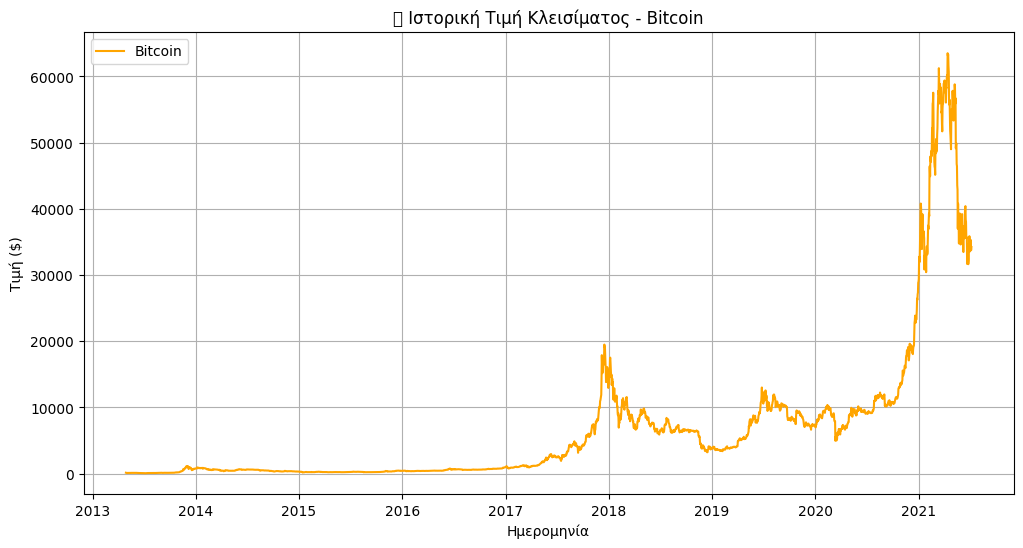

In [10]:
import matplotlib.pyplot as plt

# Παράδειγμα για Bitcoin
bitcoin_pd = dedomena["Bitcoin"].select("Date", "Close").toPandas()

plt.figure(figsize=(12,6))
plt.plot(bitcoin_pd["Date"], bitcoin_pd["Close"], label="Bitcoin", color="orange")
plt.title("📉 Ιστορική Τιμή Κλεισίματος - Bitcoin")
plt.xlabel("Ημερομηνία")
plt.ylabel("Τιμή ($)")
plt.legend()
plt.grid(True)
plt.show()


In [3]:
from pyspark.sql.functions import date_format, avg

for crypto in crypto_list:
    print(f"Monthly Average Close - {crypto}")
    df = dfs[crypto]
    
    # Hitung rata-rata harga penutupan tiap bulan
    monthly_avg = df.withColumn("Month", date_format("Date", "yyyy-MM")) \
                    .groupBy("Month") \
                    .agg(avg("Close").alias("MonthlyAvgClose")) \
                    .orderBy("Month")
    monthly_avg.createOrReplaceTempView(f"{crypto}_monthly_avg")
    monthly_avg.show(5)

    # Identifikasi bulan dengan harga penutupan TERTINGGI
    max_close_row = monthly_avg.orderBy(monthly_avg["MonthlyAvgClose"].desc()).first()
    print(f"Bulan dengan rata-rata harga penutupan TERTINGGI untuk {crypto}: {max_close_row['Month']} = {max_close_row['MonthlyAvgClose']:.2f}")
    
    # Identifikasi bulan dengan harga penutupan TERENDAH
    min_close_row = monthly_avg.orderBy("MonthlyAvgClose").first()
    print(f"Bulan dengan rata-rata harga penutupan TERENDAH untuk {crypto}: {min_close_row['Month']} = {min_close_row['MonthlyAvgClose']:.2f}\n")

Monthly Average Close - Bitcoin
+-------+------------------+
|  Month|   MonthlyAvgClose|
+-------+------------------+
|2013-04| 141.7699966430664|
|2013-05|119.99274124637726|
|2013-06|107.76140670776367|
|2013-07|   90.512206539031|
|2013-08|113.90548435334236|
+-------+------------------+
only showing top 5 rows

Bulan dengan rata-rata harga penutupan TERTINGGI untuk Bitcoin: 2021-04 = 57206.72
Bulan dengan rata-rata harga penutupan TERENDAH untuk Bitcoin: 2013-07 = 90.51

Monthly Average Close - Ethereum
+-------+------------------+
|  Month|   MonthlyAvgClose|
+-------+------------------+
|2015-08| 1.259648747742176|
|2015-09| 0.988966029882431|
|2015-10|0.6611039330882411|
|2015-11|0.9313520669937134|
|2015-12| 0.886259263561618|
+-------+------------------+
only showing top 5 rows

Bulan dengan rata-rata harga penutupan TERTINGGI untuk Ethereum: 2021-05 = 3140.73
Bulan dengan rata-rata harga penutupan TERENDAH untuk Ethereum: 2015-10 = 0.66

Monthly Average Close - Dogecoin
+---

In [13]:
from pyspark.sql.functions import date_format, avg

for crypto in crypto_list:
    print(f"Monthly Average Close - {crypto}")
    df = dfs[crypto]
    
    # Hitung rata-rata harga penutupan tiap bulan
    monthly_avg = df.withColumn("Month", date_format("Date", "yyyy-MM")) \
                    .groupBy("Month") \
                    .agg(avg("Close").alias("MonthlyAvgClose")) \
                    .orderBy("Month")
    monthly_avg.createOrReplaceTempView(f"{crypto}_monthly_avg")
    monthly_avg.show(5)

    # Identifikasi bulan dengan harga penutupan TERTINGGI
    max_close_row = monthly_avg.orderBy(monthly_avg["MonthlyAvgClose"].desc()).first()
    print(f"Bulan dengan rata-rata harga penutupan TERTINGGI untuk {crypto}: {max_close_row['Month']} = {max_close_row['MonthlyAvgClose']:.2f}")
    
    # Identifikasi bulan dengan harga penutupan TERENDAH
    min_close_row = monthly_avg.orderBy("MonthlyAvgClose").first()
    print(f"Bulan dengan rata-rata harga penutupan TERENDAH untuk {crypto}: {min_close_row['Month']} = {min_close_row['MonthlyAvgClose']:.2f}\n")




Monthly Average Close - Bitcoin
+-------+------------------+
|  Month|   MonthlyAvgClose|
+-------+------------------+
|2013-04| 141.7699966430664|
|2013-05|119.99274124637726|
|2013-06|107.76140670776367|
|2013-07|   90.512206539031|
|2013-08|113.90548435334236|
+-------+------------------+
only showing top 5 rows

Bulan dengan rata-rata harga penutupan TERTINGGI untuk Bitcoin: 2021-04 = 57206.72
Bulan dengan rata-rata harga penutupan TERENDAH untuk Bitcoin: 2013-07 = 90.51

Monthly Average Close - Ethereum
+-------+------------------+
|  Month|   MonthlyAvgClose|
+-------+------------------+
|2015-08| 1.259648747742176|
|2015-09| 0.988966029882431|
|2015-10|0.6611039330882411|
|2015-11|0.9313520669937134|
|2015-12| 0.886259263561618|
+-------+------------------+
only showing top 5 rows

Bulan dengan rata-rata harga penutupan TERTINGGI untuk Ethereum: 2021-05 = 3140.73
Bulan dengan rata-rata harga penutupan TERENDAH untuk Ethereum: 2015-10 = 0.66

Monthly Average Close - Dogecoin
+---

In [14]:
from pyspark.sql import functions as F

for crypto in crypto_list:
    print(f"\nVolatility Analysis - {crypto}")
    df = dfs[crypto]
    
    # Hitung volatilitas harian (selisih antara High dan Low)
    df = df.withColumn("Volatility", df["High"] - df["Low"])
    df.show(5)
    
    # Hitung rata-rata volatilitas bulanan
    monthly_volatility = df.withColumn("Month", date_format("Date", "yyyy-MM")) \
                            .groupBy("Month") \
                            .agg(F.avg("Volatility").alias("MonthlyAvgVolatility")) \
                            .orderBy("Month")
    
    monthly_volatility.show(5)
    
    # Identifikasi bulan dengan volatilitas TERTINGGI dan TERENDAH
    max_volatility_row = monthly_volatility.orderBy(monthly_volatility["MonthlyAvgVolatility"].desc()).first()
    print(f"Bulan dengan volatilitas TERTINGGI untuk {crypto}: {max_volatility_row['Month']} = {max_volatility_row['MonthlyAvgVolatility']:.2f}")
    
    min_volatility_row = monthly_volatility.orderBy("MonthlyAvgVolatility").first()
    print(f"Bulan dengan volatilitas TERENDAH untuk {crypto}: {min_volatility_row['Month']} = {min_volatility_row['MonthlyAvgVolatility']:.2f}")
    
    # Hitung persentase kenaikan setiap tahunnya (mengambil harga penutupan awal dan akhir untuk setiap tahunnya)
    df = df.withColumn("Year", F.year(df["Date"]))
    yearly_close = df.groupBy("Year").agg(
        F.first("Close").alias("StartClose"),
        F.last("Close").alias("EndClose")
    )
    
    # Hitung persentase kenaikan tahunan
    yearly_close = yearly_close.withColumn("AnnualPercentageChange", 
                                           ((yearly_close["EndClose"] - yearly_close["StartClose"]) / yearly_close["StartClose"]) * 100)
    
    print(f"\nPersentase Kenaikan Tahunan untuk {crypto}:")
    yearly_close.orderBy("Year").show()
    print("----------------------------------------------------------------")


Volatility Analysis - Bitcoin
+---+-------+------+----------+------------------+------------------+------------------+------------------+------+---------------+------------------+
|SNo|   Name|Symbol|      Date|              High|               Low|              Open|             Close|Volume|      Marketcap|        Volatility|
+---+-------+------+----------+------------------+------------------+------------------+------------------+------+---------------+------------------+
|  1|Bitcoin|   BTC|2013-04-29|147.48800659179688|             134.0|134.44400024414062| 144.5399932861328|   0.0| 1.6037688645E9|13.488006591796875|
|  2|Bitcoin|   BTC|2013-04-30|146.92999267578125| 134.0500030517578|             144.0|             139.0|   0.0|  1.542813125E9|12.879989624023438|
|  3|Bitcoin|   BTC|2013-05-01|139.88999938964844|107.72000122070312|             139.0|116.98999786376953|   0.0|1.29895459375E9| 32.16999816894531|
|  4|Bitcoin|   BTC|2013-05-02| 125.5999984741211| 92.28189849853516|

In [15]:
from pyspark.sql.window import Window

growth_consistency = []

for crypto in crypto_list:
    df = dfs[crypto]

    # Pastikan hanya satu kolom Date yang digunakan (format date Spark)
    df = df.withColumn("Date", F.to_date("Date", "dd-MM-yyyy"))
    df = df.withColumn("Year", F.year("Date"))
    
    # Ambil harga awal dan akhir per tahun
    windowSpec = Window.partitionBy("Year").orderBy("Date")
    df = df.withColumn("RankAsc", F.row_number().over(windowSpec))
    df = df.withColumn("RankDesc", F.row_number().over(windowSpec.orderBy(F.col("Date").desc())))
    
    start_prices = df.filter(F.col("RankAsc") == 1).select("Year", F.col("Close").alias("Start"))
    end_prices = df.filter(F.col("RankDesc") == 1).select("Year", F.col("Close").alias("End"))

    yearly = start_prices.join(end_prices, on="Year")
    yearly = yearly.withColumn("AnnualReturn", ((col("End") - col("Start")) / col("Start")) * 100)

    # Hitung jumlah tahun positif dan rata-rata return tahunan
    total_years = yearly.count()
    positive_years = yearly.filter(col("AnnualReturn") > 0).count()
    avg_annual_return = yearly.agg(F.avg("AnnualReturn")).first()[0]

    growth_consistency.append((crypto, total_years, positive_years, avg_annual_return))

# Tampilkan hasil
growth_df = spark.createDataFrame(growth_consistency, ["Crypto", "TotalYears", "PositiveYears", "AvgAnnualReturn"])
growth_df = growth_df.withColumn("ConsistencyRate", (col("PositiveYears") / col("TotalYears")) * 100)
growth_df.orderBy(col("AvgAnnualReturn").desc(), col("ConsistencyRate").desc()).show()

# Mengambil barisan pertama berdasarkan kolom "AvgAnnualReturn"
max_avg_annual_return_row = growth_df.orderBy(growth_df["AvgAnnualReturn"].desc()).first()

# Mengambil barisan pertama berdasarkan kolom "ConsistencyRate"
max_consistency_rate = growth_df.orderBy(growth_df["ConsistencyRate"].desc()).first()

print(f'Cryptocurrency dengan tren pertumbuhan harga tahunan tertinggi berdasarkan rata-rata return per tahun adalah {max_avg_annual_return_row["Crypto"]}')
print(f'Cryptocurrency dengan tren pertumbuhan harga paling konsisten adalah {max_consistency_rate["Crypto"]}')

+-----------+----------+-------------+------------------+-----------------+
|     Crypto|TotalYears|PositiveYears|   AvgAnnualReturn|  ConsistencyRate|
+-----------+----------+-------------+------------------+-----------------+
|BinanceCoin|         5|            4|1826.5011705874076|             80.0|
|   Ethereum|         7|            5|1502.2286450617787|71.42857142857143|
|   Dogecoin|         9|            5| 886.5352008533324|55.55555555555556|
|    Bitcoin|         9|            7|241.55516185916838|77.77777777777779|
|       Aave|         2|            2|157.60628663307023|            100.0|
+-----------+----------+-------------+------------------+-----------------+

Cryptocurrency dengan tren pertumbuhan harga tahunan tertinggi berdasarkan rata-rata return per tahun adalah BinanceCoin
Cryptocurrency dengan tren pertumbuhan harga paling konsisten adalah Aave


In [17]:
# Menyimpan hasil rata-rata volatilitas keseluruhan tiap kripto
overall_volatilities = []

for crypto in crypto_list:
    df = dfs[crypto].withColumn("Volatility", col("High") - col("Low"))
    avg_vol = df.select(F.avg("Volatility")).first()[0]
    overall_volatilities.append((crypto, avg_vol))

print(overall_volatilities)

# Menentukan kripto dengan volatilitas tertinggi
most_volatile = max(overall_volatilities, key=lambda x: x[1])
print(f"Cryptocurrency dengan volatilitas TERTINGGI secara keseluruhan: {most_volatile[0]} dengan rata-rata volatilitas {most_volatile[1]:.2f}")

[('Bitcoin', 407.3164998036554), ('Ethereum', 32.66597936333834), ('Dogecoin', 0.0025621122551282654), ('Aave', 33.57071588585455), ('BinanceCoin', 5.5982872625077125)]


TypeError: max() got an unexpected keyword argument 'key'

In [18]:
pip install statsmodels matplotlib pandas


Note: you may need to restart the kernel to use updated packages.


/tmp/ipykernel_31/2899991864.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bitcoin_pd = bitcoin_pd.asfreq("D").fillna(method="ffill")
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


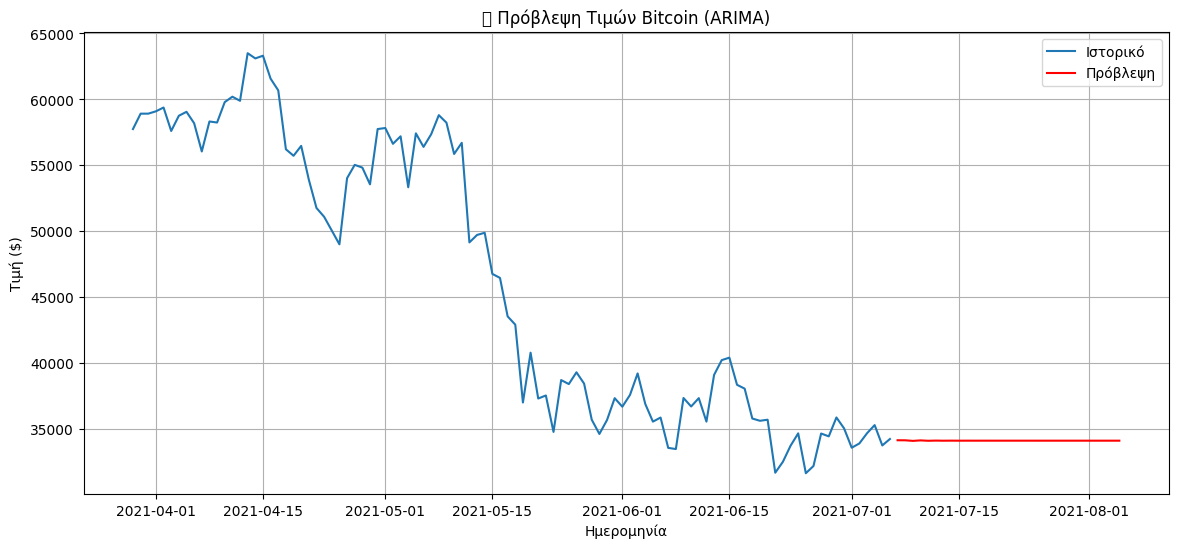

In [20]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Μετατροπή Spark DataFrame σε Pandas
bitcoin_pd = dfs["Bitcoin"].select("Date", "Close").orderBy("Date").toPandas()
bitcoin_pd.set_index("Date", inplace=True)

# Πρέπει να έχει ημερήσια συχνότητα
bitcoin_pd = bitcoin_pd.asfreq("D").fillna(method="ffill")

# Εκπαίδευση μοντέλου ARIMA
model = ARIMA(bitcoin_pd["Close"], order=(5, 1, 2))  # (p,d,q)
model_fit = model.fit()

# Πρόβλεψη επόμενων 30 ημερών
forecast = model_fit.forecast(steps=30)

# Οπτικοποίηση
plt.figure(figsize=(14,6))
plt.plot(bitcoin_pd.index[-100:], bitcoin_pd["Close"].tail(100), label="Ιστορικό")
plt.plot(pd.date_range(bitcoin_pd.index[-1], periods=31, freq="D")[1:], forecast, label="Πρόβλεψη", color="red")
plt.title("🔮 Πρόβλεψη Τιμών Bitcoin (ARIMA)")
plt.xlabel("Ημερομηνία")
plt.ylabel("Τιμή ($)")
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipykernel_31/2420697909.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.asfreq("D").fillna(method="ffill")  # Γεμίζει τα κενά
/tmp/ipykernel_31/2420697909.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.asfreq("D").fillna(method="ffill")  # Γεμίζει τα κενά
/tmp/ipykernel_31/2420697909.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.asfreq("D").fillna(method="ffill")  # Γεμίζει τα κενά
/tmp/ipykernel_31/2420697909.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.asfreq("D").fillna(method="ffill")  # Γεμίζει τα κενά
/tmp/ipykernel_31/2420697909.py:12: FutureWarning: DataF

🔗 Πίνακας Συσχέτισης:

              Bitcoin  Ethereum  Dogecoin      Aave  BinanceCoin
Bitcoin      1.000000  0.904147  0.648206  0.877041     0.856401
Ethereum     0.904147  1.000000  0.837741  0.868677     0.904260
Dogecoin     0.648206  0.837741  1.000000  0.609485     0.889387
Aave         0.877041  0.868677  0.609485  1.000000     0.774158
BinanceCoin  0.856401  0.904260  0.889387  0.774158     1.000000


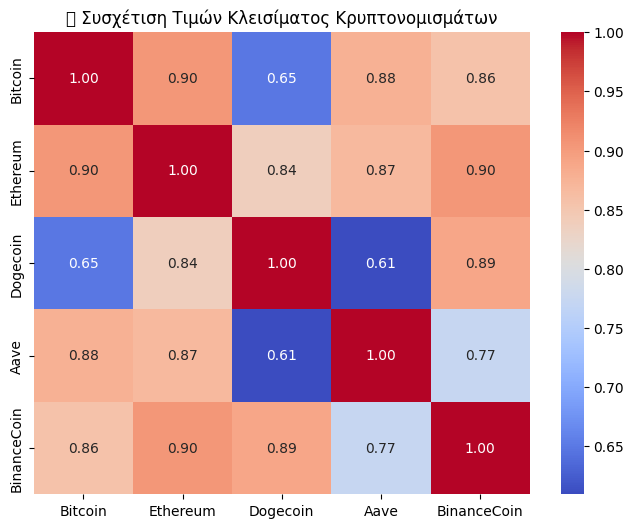

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Συγκέντρωση όλων των Close τιμών σε ένα DataFrame
close_prices = pd.DataFrame()

for crypto in crypto_list:
    df = dfs[crypto].select("Date", "Close").toPandas()
    df["Date"] = pd.to_datetime(df["Date"])
    df.set_index("Date", inplace=True)
    df = df.asfreq("D").fillna(method="ffill")  # Γεμίζει τα κενά
    close_prices[crypto] = df["Close"]

# Υπολογισμός πίνακα συσχέτισης
correlation_matrix = close_prices.corr(method="pearson")
print("🔗 Πίνακας Συσχέτισης:\n")
print(correlation_matrix)

# Οπτικοποίηση ως heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("💠 Συσχέτιση Τιμών Κλεισίματος Κρυπτονομισμάτων")
plt.show()


🔍 Πώς διαβάζεται ο πίνακας:
Τιμές κοντά στο +1: κινούνται παρόμοια.

Τιμές κοντά στο -1: κινούνται αντίθετα.

Τιμές κοντά στο 0: ασχετίζονται.

In [23]:
pip install streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 56.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 80.8 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


2025-05-04 19:08:11.427 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-04 19:08:11.428 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-04 19:08:11.584 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-05-04 19:08:11.585 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-04 19:08:11.586 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-04 19:08:11.588 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-04 19:08:11.588 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

DeltaGenerator()

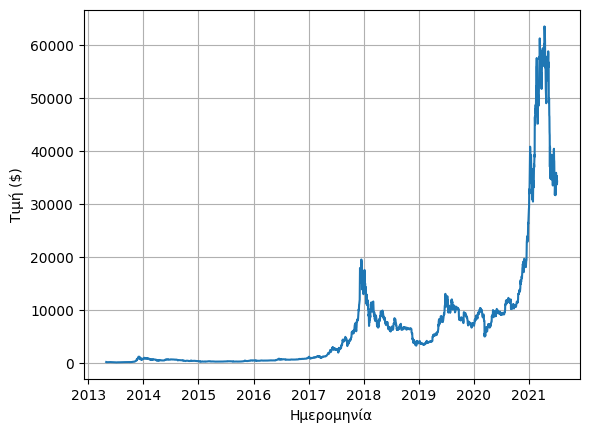

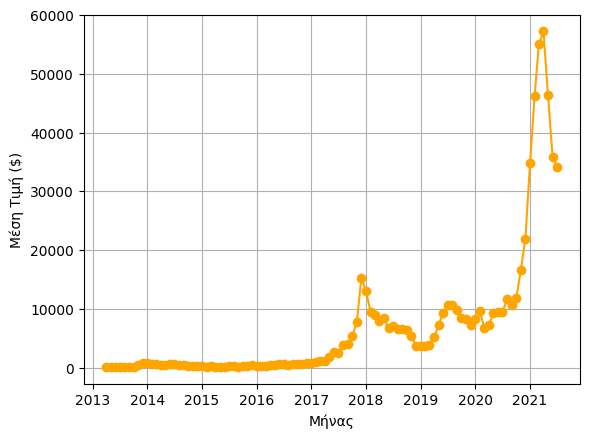

In [24]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql.functions import date_format, avg

st.set_page_config(page_title="Crypto Dashboard", layout="centered")

st.title("📈 Crypto Dashboard")
st.markdown("Επιλέξτε κρυπτονόμισμα για να δείτε ανάλυση τιμής.")

# Επιλογή νομίσματος
selected_crypto = st.selectbox("Διάλεξε κρυπτονόμισμα:", crypto_list)

# Πάρε το αντίστοιχο Spark DF και μετατροπή σε Pandas
df_spark = dfs[selected_crypto].orderBy("Date")
df = df_spark.select("Date", "Close").toPandas()
df["Date"] = pd.to_datetime(df["Date"])

# Γραφικό τιμής κλεισίματος
st.subheader("📉 Ιστορική Τιμή Κλεισίματος")
fig, ax = plt.subplots()
ax.plot(df["Date"], df["Close"], label="Τιμή Κλεισίματος")
ax.set_xlabel("Ημερομηνία")
ax.set_ylabel("Τιμή ($)")
ax.grid(True)
st.pyplot(fig)

# Υπολογισμός μέσης τιμής ανά μήνα
df["Month"] = df["Date"].dt.to_period("M")
monthly_avg = df.groupby("Month")["Close"].mean().reset_index()
monthly_avg["Month"] = monthly_avg["Month"].dt.to_timestamp()

# Γραφικό μέσης μηνιαίας τιμής
st.subheader("🗓️ Μέση Τιμή Κλεισίματος Ανά Μήνα")
fig2, ax2 = plt.subplots()
ax2.plot(monthly_avg["Month"], monthly_avg["Close"], marker='o', color="orange")
ax2.set_xlabel("Μήνας")
ax2.set_ylabel("Μέση Τιμή ($)")
ax2.grid(True)
st.pyplot(fig2)
